GOAL: Provide a summary and insights from the dataset to enhance the overall customer experience.

In [1]:
# Import necessary libraries for data analysis

import numpy as np                  # For numerical computations
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # For data visualization
%matplotlib inline
import seaborn as sns               # For enhanced data visualization

In [2]:
df = pd.read_csv('Diwali Sales Data.csv' , encoding = 'latin-1') # Reading the CSV file, using the Latin-1 encoding

In [3]:
df.shape # Displaying the dimensions (rows, columns) of the DataFrame

(11251, 15)

In [4]:
df.head(10) # Displaying the first 10 rows of the DataFrame

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info() # Displaying information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [7]:
df.shape

(11251, 13)

In [8]:
# check for null values
pd.isnull(df).sum() 

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# drop null values
df.dropna(inplace=True)

In [10]:
df.shape

(11239, 13)

In [11]:
# change data type 
df['Amount'] = df['Amount'].astype('int')

In [12]:
df['Amount'].dtypes

dtype('int32')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
# Using describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

#### Gender

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

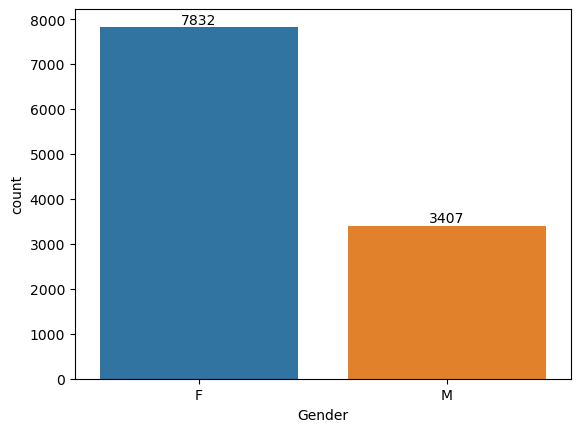

In [16]:
# Creating a count plot of 'Gender' using Seaborn
ax = sns.countplot(x = 'Gender', data = df) 

# Add labels to the bars in the count plot
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
# Grouping the DataFrame by 'Gender', calculating the total 'Amount' for each gender, 
# and sorting the results by 'Amount' in descending order

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


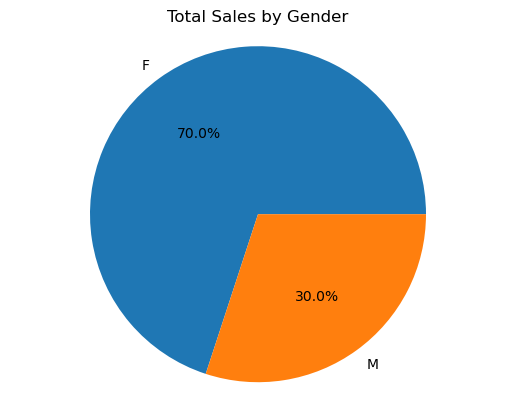

In [18]:
# Creating a pie chart to visualize total sales by gender
plt.pie(sales_gen['Amount'], labels=sales_gen['Gender'], autopct='%1.1f%%') # pie chart with sales amounts and gender labels
plt.title('Total Sales by Gender') # Adding a title to the pie chart
plt.axis('equal') # Ensuring the pie chart is drawn as a circle
plt.show() # Display the pie chart

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

#### Age

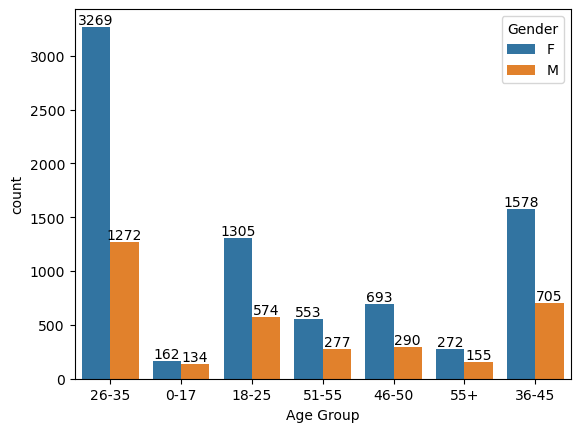

In [19]:
# Creating a count plot to visualize Age Group distribution with Gender comparison
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

# Add labels to the bars in the count plot
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

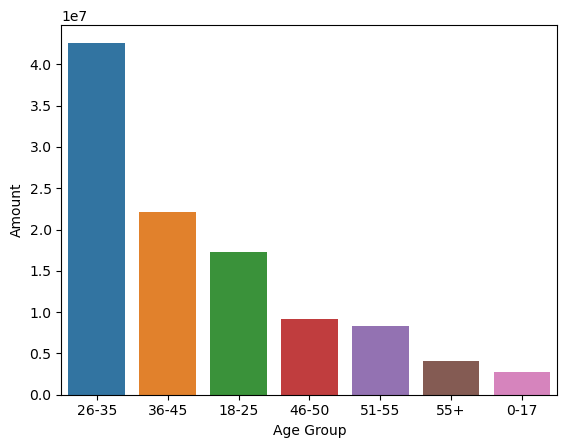

In [20]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age)

From above graphs we can see that most of the buyeres are of age group between 26-35 yrs female

#### State

<Axes: xlabel='State', ylabel='Orders'>

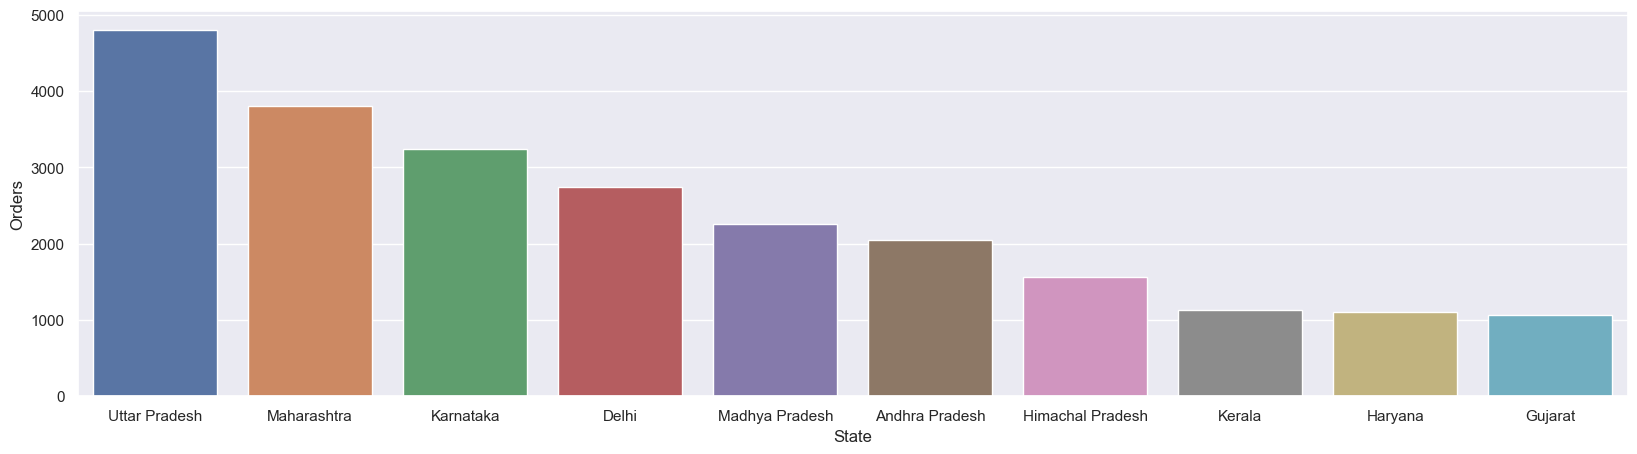

In [21]:
# Group the DataFrame by 'State', calculate the sum of 'Orders', and sort to get top 10 states with highest orders
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)}) # Set the figure size for the plot

sns.barplot(data=sales_state, x='State', y='Orders') # Creating bar plot to visualize the top 10 states with highest orders

<Axes: xlabel='State', ylabel='Amount'>

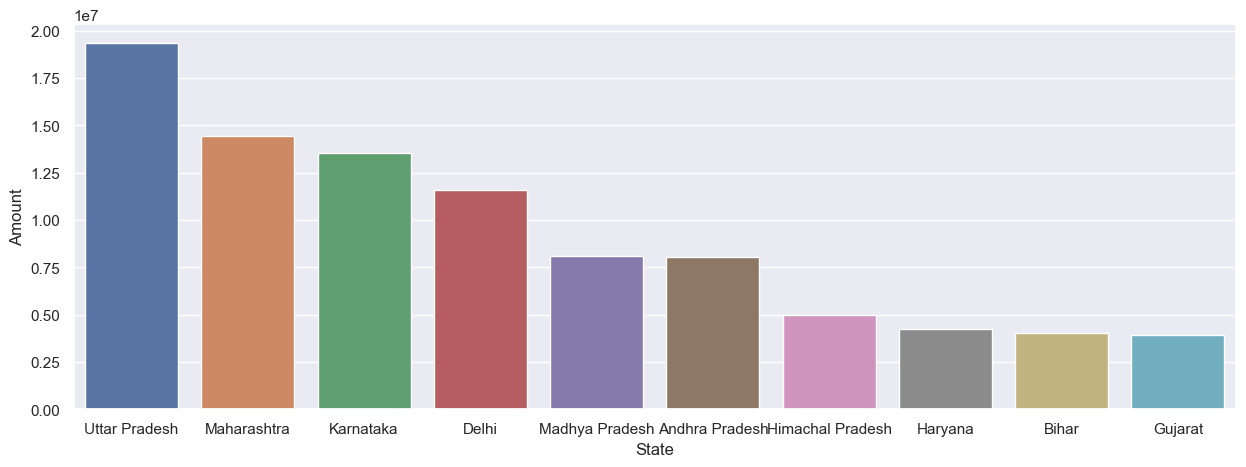

In [22]:
# Group the DataFrame by 'State', calculate the sum of 'Amount', and extract the top 10 states with the highest total amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)}) # Set the figure size for the plot

sns.barplot(data=sales_state, x='State', y='Amount') # Creating bar plot to visualize the top 10 states with the highest amount

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnatak respectively.

#### Marital Status

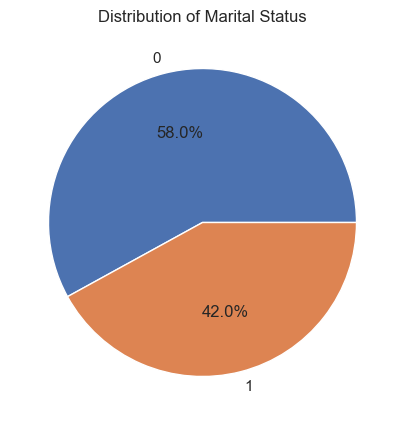

In [23]:
# Create a count of values for each category of 'Marital_Status'
marital_counts = df['Marital_Status'].value_counts()

# Plot a pie chart using the marital status counts
plt.figure(figsize=(7, 5))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Marital Status')
plt.show()

<Axes: xlabel='Marital_Status', ylabel='Amount'>

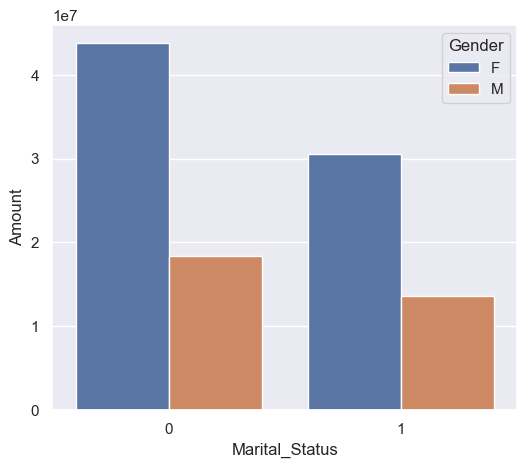

In [24]:
# Group the DataFrame by 'Marital_Status' and 'Gender', calculate the total 'Amount' for each combination, and sort the values
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)}) # Set the figure size for the plot

# Creating a bar plot to visualize 'Amount' based on 'Marital_Status' with comparison by 'Gender'
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender') 

From above graphs we can see that most of the buyers are married(women) and they have high purchasing power.

#### Occupation

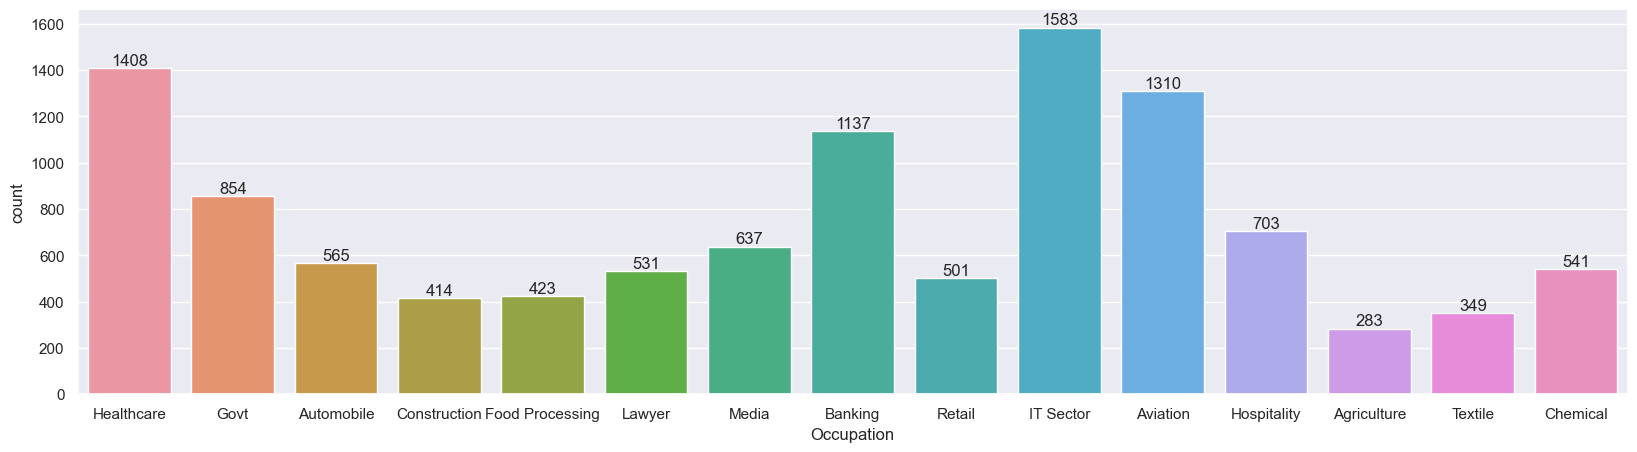

In [25]:
# Set the figure size for the plot
sns.set(rc={'figure.figsize':(20,5)})

# Creating a count plot to visualize the distribution of 'Occupation'
ax = sns.countplot(data=df, x='Occupation')

# Add labels to the bars in the count plot
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

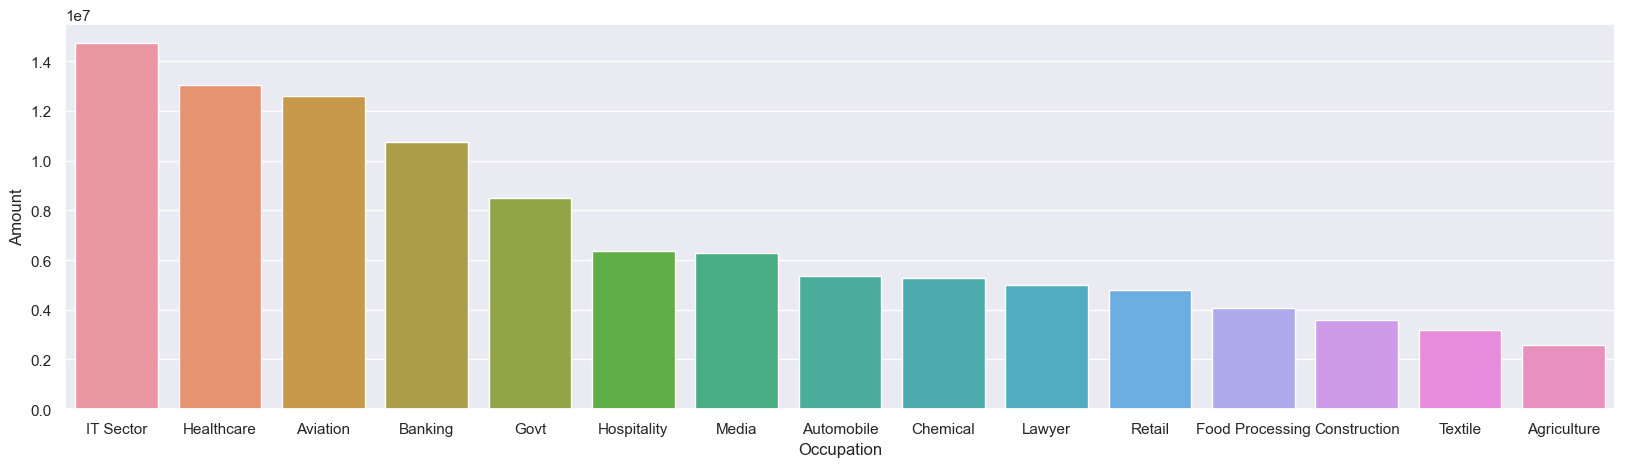

In [26]:
# Grouping the DataFrame by 'Occupation', calculating the total 'Amount' for each occupation, and sorting the values
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)}) # Setting the figure size for the plot

# Creating a bar plot to visualize the total 'Amount' for each occupation
sns.barplot(data = sales_state, x='Occupation',y='Amount') 

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

#### Product Category

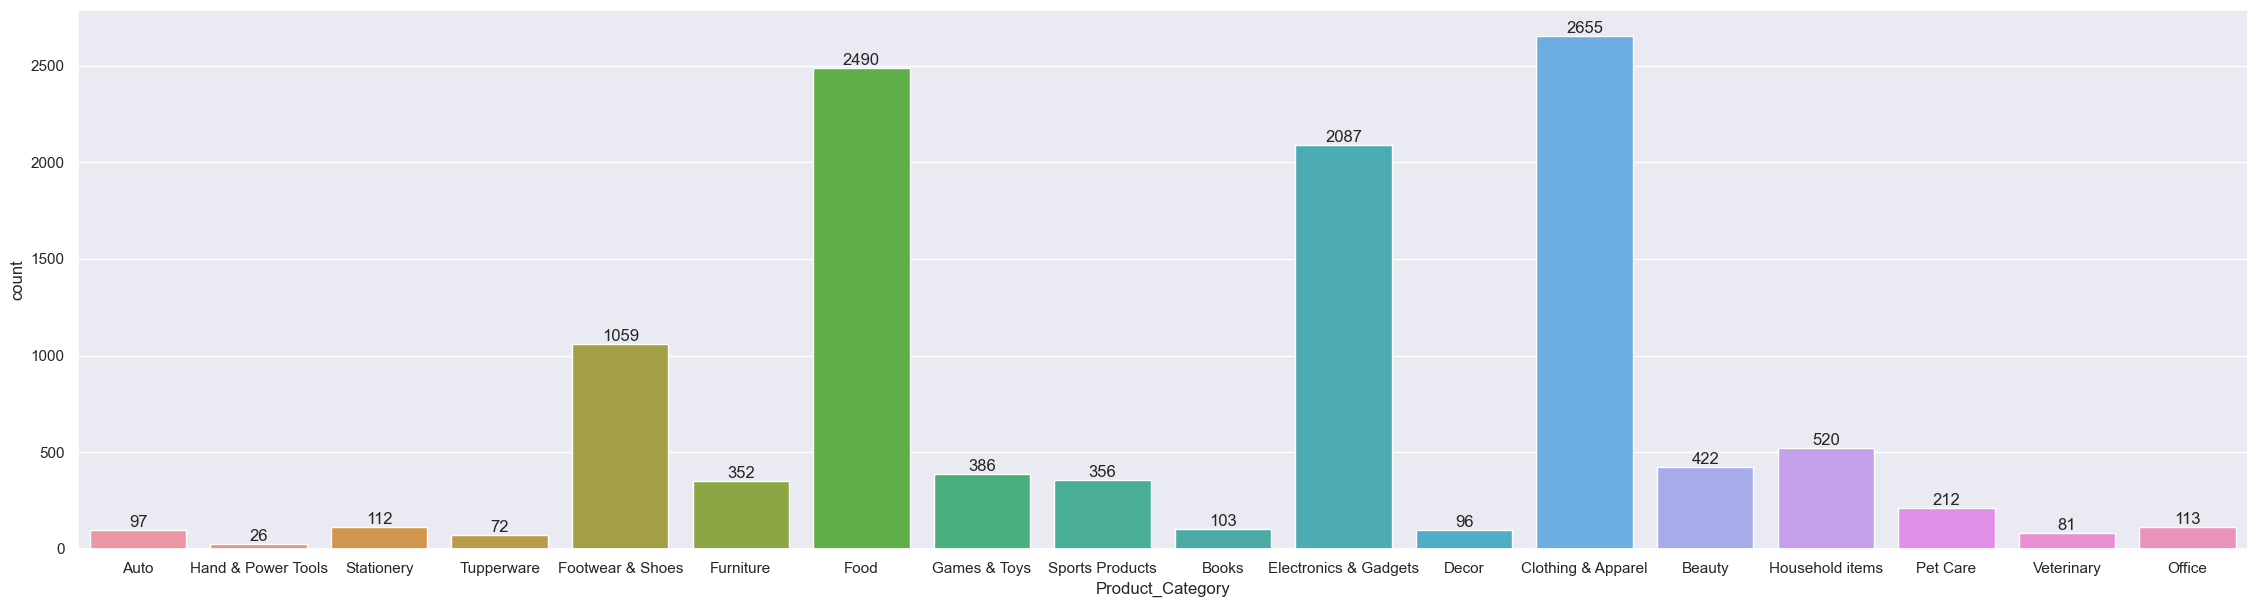

In [27]:
sns.set(rc={'figure.figsize':(28,7)}) # Set the figure size for the plot

# Creating count plot to visualize the distribution of 'Product_Category'
ax = sns.countplot(data=df, x='Product_Category')

# Add labels to the bars in the count plot
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

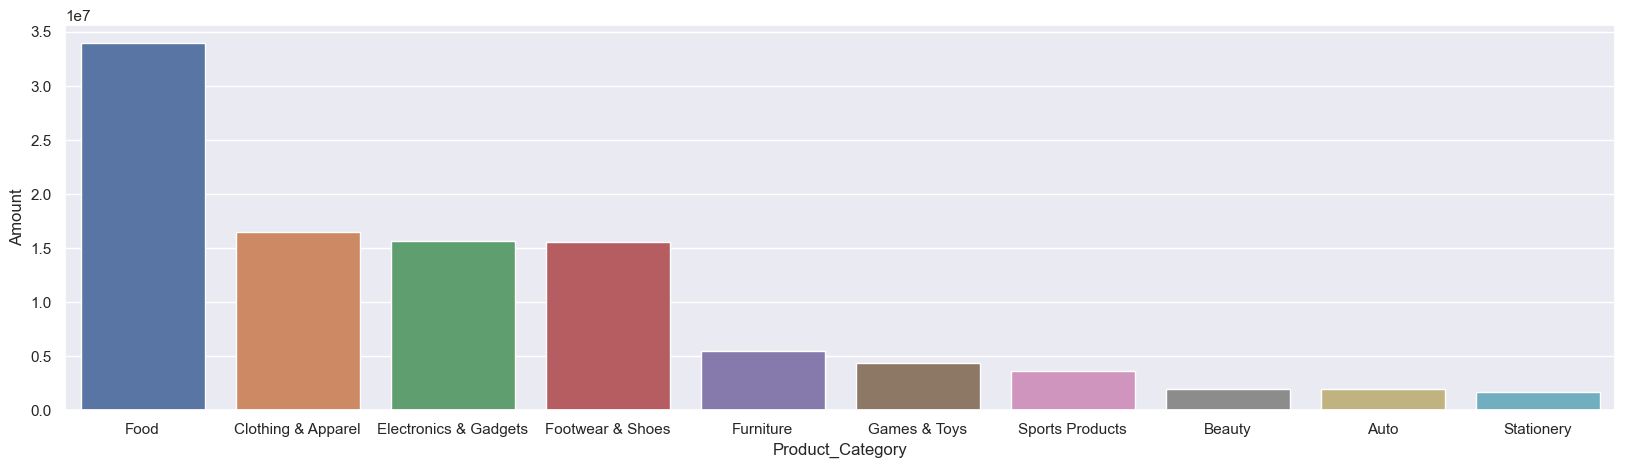

In [28]:
# Grouping the DataFrame by 'Product_Category', calculating the total 'Amount' for each category, and sorting the values
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)}) # Setting the figure size for the plot
# Creating a bar plot to visualize the total 'Amount' for each 'Product_Category'
sns.barplot(data=sales_state, x='Product_Category', y='Amount')

*Married women in the age group of 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation, are more inclined to purchase products from the Food, Clothing, and Electronics categories.*